<a href="https://colab.research.google.com/github/tung134245/LSTM/blob/main/LSTM_Keras_Spam_Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/DeepLearning/Chapter7/Data/'

/content/gdrive/My Drive/DeepLearning/Chapter7/Data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop


In [4]:
comments_df_file = []
comments_file = ['Youtube01-Psy.csv',
                 'Youtube02-KatyPerry.csv',
                 'Youtube03-LMFAO.csv',
                 'Youtube04-Eminem.csv',
                 'Youtube05-Shakira.csv']
for f in comments_file:
  print(f)
  df = pd.read_csv(f)
  comments_df_file.append(df)
comments_df = pd.concat(comments_df_file)
comments_df

Youtube01-Psy.csv
Youtube02-KatyPerry.csv
Youtube03-LMFAO.csv
Youtube04-Eminem.csv
Youtube05-Shakira.csv


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [5]:
df = comments_df[['CONTENT', 'CLASS']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1956 non-null   object
 1   CLASS    1956 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


In [6]:
df['WORDS'] = df.CONTENT.map(lambda x: len(x.split()))
df

<ipython-input-6-0c006545ca61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WORDS'] = df.CONTENT.map(lambda x: len(x.split()))


,CONTENT,CLASS,WORDS
0,"Huh, anyway check out this you[tube] channel: ...",1,8
1,Hey guys check out my new channel and our firs...,1,30
2,just for test I have to say murdev.com,1,8
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,11
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,5
...,...,...,...
365,I love this song because we sing it at Camp al...,0,13
366,I love this song for two reasons: 1.it is abou...,0,18
367,wow,0,1
368,Shakira u are so wiredo,0,5


In [7]:
df.WORDS.describe()

count    1956.000000
mean       15.581800
std        21.532844
min         1.000000
25%         5.000000
50%         8.000000
75%        16.000000
max       213.000000
Name: WORDS, dtype: float64

In [8]:
df.groupby('CLASS').mean('WORDS')

,WORDS
CLASS,
0,9.100946
1,21.714428


In [9]:
df_count_class = pd.DataFrame(df.CLASS.value_counts())
df_count_class.index

Int64Index([1, 0], dtype='int64')

Text(0.5, 1.0, 'Number of ham-0 and spam-1 content')

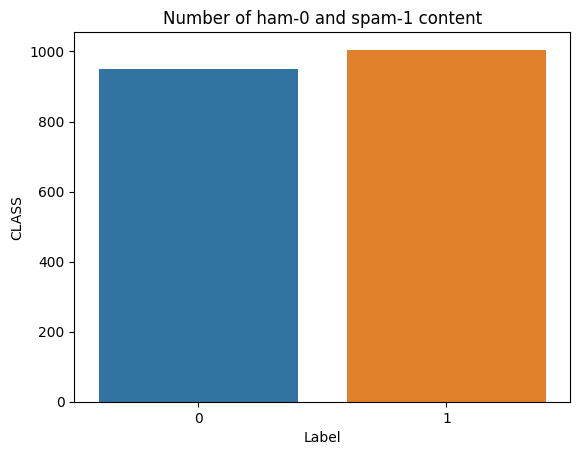

In [10]:
sns.barplot(data = df_count_class, x = df_count_class.index, y = df_count_class.CLASS)
plt.xlabel('Label')
plt.title('Number of ham-0 and spam-1 content')

In [11]:
X = df.CONTENT
y = df.CLASS

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [13]:
from tensorflow.keras.preprocessing import sequence
max_words = 1000
max_len = 150
tok = Tokenizer(num_words= max_words)
tok.fit_on_texts(X_train)

sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen = max_len)

In [14]:
sequences_matrix.shape, X_train.shape, y_train.shape

((1369, 150), (1369,), (1369,))

In [15]:
model = Sequential()
model.add(Embedding(max_words, 50)) ## Text thì có embedding và LSTM
model.add(LSTM(64))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(),
              metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 96337 (376.32 KB)
Trainable params: 96337 (376.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tính tham số

* embedding layer = inputs x outputs = 1000 x 50 = 50000
* lstm layer = [(num_units + input_dim + 1) x num_units] x 4 = (64 + 50 + 1) * 64 * 4 = 29440 # 3 cổng sigma + 1 tanH
* dense layer = 64 * 256 + 256 = 16640
* dropout = 0
* dense output layer = 256 * 1 + 1


In [18]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

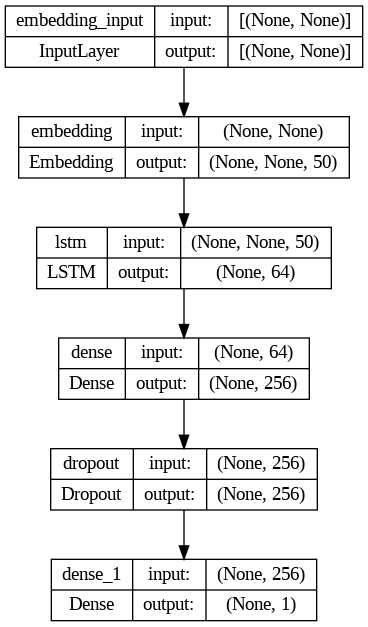

In [19]:
plot_model(model, to_file = 'LSTM_Youtube_Spam.png', show_shapes = True)
Image(filename = 'LSTM_Youtube_Spam.png')

In [20]:
history = model.fit(sequences_matrix, y_train,
                  batch_size = 128,
                    epochs = 50,
                    validation_split = 0.2,
                    callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5)])

Epoch 1/50
9/9 [==============================] - 11s 231ms/step - loss: 0.6865 - accuracy: 0.6502 - val_loss: 0.6717 - val_accuracy: 0.7007
Epoch 2/50
9/9 [==============================] - 1s 166ms/step - loss: 0.6432 - accuracy: 0.7142 - val_loss: 0.6124 - val_accuracy: 0.7409
Epoch 3/50
9/9 [==============================] - 2s 171ms/step - loss: 0.5494 - accuracy: 0.7717 - val_loss: 0.5249 - val_accuracy: 0.7628
Epoch 4/50
9/9 [==============================] - 2s 203ms/step - loss: 0.4104 - accuracy: 0.8438 - val_loss: 0.4075 - val_accuracy: 0.8248
Epoch 5/50
9/9 [==============================] - 2s 205ms/step - loss: 0.2776 - accuracy: 0.9014 - val_loss: 0.3072 - val_accuracy: 0.8686
Epoch 6/50
9/9 [==============================] - 1s 111ms/step - loss: 0.1997 - accuracy: 0.9397 - val_loss: 0.2328 - val_accuracy: 0.9088
Epoch 7/50
9/9 [==============================] - 1s 149ms/step - loss: 0.1545 - accuracy: 0.9525 - val_loss: 0.2199 - val_accuracy: 0.9015
Epoch 8/50
9/9 [===

In [21]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen = max_len)
test_sequences_matrix

array([[  0,   0,   0, ..., 254,   7,   2],
       [  0,   0,   0, ...,   0,   0, 284],
       [  0,   0,   0, ...,  86,  39, 179],
       ...,
       [  0,   0,   0, ...,  19,  59,   2],
       [  0,   0,   0, ...,   6,  84, 702],
       [  0,   0,   0, ...,   5,  23,   2]], dtype=int32)

In [22]:
model.evaluate(test_sequences_matrix, y_test)

19/19 [==============================] - 0s 7ms/step - loss: 0.2284 - accuracy: 0.9353


[0.22839045524597168, 0.9352640509605408]

In [23]:
from tensorflow.keras.models import load_model
model.save('LSTM_Spam_youtube_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
history_df = pd.DataFrame(history.history)

<Axes: >

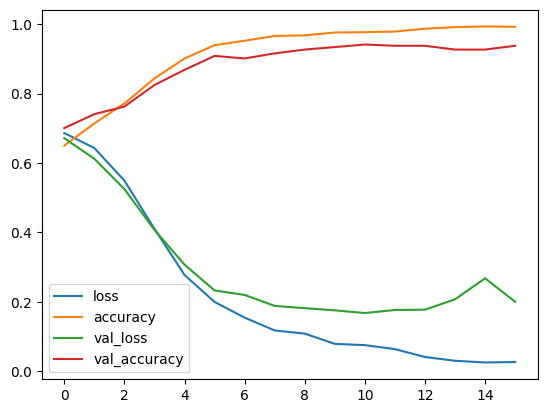

In [25]:
history_df.plot()